## Import packages and datasets

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from evaluate_classification_models import *
from HelperFunctions import *

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier


In [2]:
pre_2019_2020 = pd.read_csv("Cleaned_Datasets/2019_2020/pre_2019_2020.csv")
stress_endterm_2019_2020 = pd.read_csv("Cleaned_Datasets/2019_2020/stress_endterm_2019_2020.csv")
ema_2019_2020 = pd.read_csv("Cleaned_Datasets/2019_2020/ema_2019_2020.csv")
calls_2019_2020 = pd.read_csv("Cleaned_Datasets/2019_2020/calls_2019_2020.csv")
bluetooth_2019_2020 = pd.read_csv("Cleaned_Datasets/2019_2020/bluetooth_2019_2020.csv")
screen_2019_2020 = pd.read_csv("Cleaned_Datasets/2019_2020/screen_2019_2020.csv")
location_2019_2020 = pd.read_csv("Cleaned_Datasets/2019_2020/location_2019_2020.csv")
steps_2019_2020 = pd.read_csv("Cleaned_Datasets/2019_2020/steps_2019_2020.csv")
sleep_2019_2020 = pd.read_csv("Cleaned_Datasets/2019_2020/sleep_2019_2020.csv")

pre_2021 = pd.read_csv("Cleaned_Datasets/2021/pre_2021.csv")
stress_endterm_2021 = pd.read_csv("Cleaned_Datasets/2021/stress_endterm_2021.csv")
ema_2021 = pd.read_csv("Cleaned_Datasets/2021/ema_2021.csv")
calls_2021 = pd.read_csv("Cleaned_Datasets/2021/calls_2021_ssa.csv")
bluetooth_2021 = pd.read_csv("Cleaned_Datasets/2021/bluetooth_2021_ssa.csv")
screen_2021 = pd.read_csv("Cleaned_Datasets/2021/screen_2021_ssa.csv")
location_2021 = pd.read_csv("Cleaned_Datasets/2021/location_2021_ssa.csv")
steps_2021 = pd.read_csv("Cleaned_Datasets/2021/steps_2021_ssa.csv")
sleep_2021 = pd.read_csv("Cleaned_Datasets/2021/sleep_2021_ssa.csv")


## Perform univariate feature selection and evaluate prediction models

In [3]:
# models to fit
random_states = range(0, 10)
models_with_params = {
    'Logistic Regression': (LogisticRegression(multi_class='multinomial', random_state=0, max_iter=10000), {'C': [0.001, 0.01, 0.1, 1, 10]}),
    'Random Forest': (RandomForestClassifier(random_state=0),{'max_depth': [3, 5, 7]}),
    'XGBoost': (XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='mlogloss'), {'max_depth': [3, 5, 7]}),
    'SVM': (SVC(random_state=0, probability=True), {'C': [0.001, 0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    #'MLP Classifier': (MLPClassifier(random_state=0, max_iter=1000), {'hidden_layer_sizes': [(50,), (100,), (50,50)], 'alpha': [0.0001, 0.001, 0.01], 'learning_rate': ['constant', 'adaptive']}),
    'Dummy Classifier': (DummyClassifier(strategy='most_frequent', random_state=0), {})
}


In [4]:
stress_endterm_2019_2020 = stress_endterm_2019_2020.dropna(subset=['PSS_10items_POST'])
stress_endterm_2021 = stress_endterm_2021.dropna(subset=['PSS_10items_POST'])


In [5]:
bins = [0, 13, 26, 40]
labels = ['Low', 'Medium', 'High']

stress_endterm_2019_2020['PSS_10items_POST'] = pd.cut(stress_endterm_2019_2020['PSS_10items_POST'], bins=bins, labels=labels, right=False)
print(stress_endterm_2019_2020['PSS_10items_POST'].value_counts(dropna=False))

stress_endterm_2021['PSS_10items_POST'] = pd.cut(stress_endterm_2021['PSS_10items_POST'], bins=bins, labels=labels, right=False)
print(stress_endterm_2021['PSS_10items_POST'].value_counts(dropna=False))


PSS_10items_POST
Medium    246
Low        74
High       55
Name: count, dtype: int64
PSS_10items_POST
Medium    127
Low        46
High       27
Name: count, dtype: int64


### Pre and Endterm

In [6]:
class_index = list(['High', 'Low', 'Medium']).index('High')
class_index

0

In [7]:
df_pre_post = merge_datasets([pre_2019_2020, stress_endterm_2019_2020], on_column = 'pid', how = 'inner')
df_pre_post = df_pre_post.dropna()
print(df_pre_post.shape)
_, df_pre_post_selected = perform_rfecv_classification(df_pre_post)
print(df_pre_post_selected.shape)

(354, 29)
Optimal number of features: 16
Features selected: ['UCLA_10items_PRE', 'SocialFit_PRE', '2waySSS_giving_instrumental_PRE', 'ERQ_suppression_PRE', 'BRS_PRE', 'CHIPS_PRE', 'PSS_10items_PRE', 'PSS_14items_PRE', 'STAI_PRE', 'MAAS_15items_PRE', 'CESD_9items_PRE', 'BDI2_PRE', 'BriefCope_maladaptive_PRE', 'GQ_PRE', 'FSPWB_PRE', 'CEDH_PRE']
(354, 18)


In [8]:
pre_post_results = evaluate_multiple_models(df_pre_post_selected, models_with_params, random_states)

### EMA and Endterm

In [9]:
df_ema_post = merge_datasets([ema_2019_2020, stress_endterm_2019_2020], on_column = 'pid', how = 'inner')
df_ema_post = df_ema_post.dropna()
print(df_ema_post.shape)
_, df_ema_post_selected = perform_rfecv_classification(df_ema_post)
print(df_ema_post_selected.shape)


(300, 52)
Optimal number of features: 34
Features selected: ['phq4_EMA_mean', 'phq4_EMA_median', 'phq4_EMA_max', 'phq4_EMA_std', 'phq4_EMA_skew', 'phq4_EMA_kurt', 'phq4_EMA_rmsd', 'phq4_anxiety_EMA_mean', 'phq4_anxiety_EMA_max', 'phq4_anxiety_EMA_skew', 'phq4_anxiety_EMA_autocorr', 'phq4_depression_EMA_mean', 'phq4_depression_EMA_median', 'phq4_depression_EMA_std', 'phq4_depression_EMA_autocorr', 'positive_affect_EMA_mean', 'positive_affect_EMA_median', 'positive_affect_EMA_max', 'positive_affect_EMA_min', 'positive_affect_EMA_std', 'positive_affect_EMA_skew', 'positive_affect_EMA_kurt', 'positive_affect_EMA_iqr', 'positive_affect_EMA_autocorr', 'positive_affect_EMA_rmsd', 'negative_affect_EMA_mean', 'negative_affect_EMA_median', 'negative_affect_EMA_max', 'negative_affect_EMA_std', 'negative_affect_EMA_skew', 'negative_affect_EMA_kurt', 'negative_affect_EMA_iqr', 'negative_affect_EMA_autocorr', 'negative_affect_EMA_rmsd']
(300, 36)


In [10]:
ema_post_results = evaluate_multiple_models(df_ema_post_selected, models_with_params, random_states)

### Pre, EMA, and Endterm

In [11]:
#df_pre_ema_post = merge_datasets([pre_2019_2020, ema_2019_2020_transformed, stress_endterm_2019_2020], on_column = 'pid', how = 'inner')

df_pre_ema_post = merge_datasets([df_pre_post_selected, df_ema_post_selected, stress_endterm_2019_2020], on_column=['pid', 'PSS_10items_POST'], how='inner')

df_pre_ema_post = df_pre_ema_post.dropna()
print(df_pre_ema_post.shape)
results_filtered, df_pre_ema_post_selected = perform_rfecv_classification(df_pre_ema_post)
print(df_pre_ema_post_selected.shape)


(283, 52)
Optimal number of features: 50
Features selected: ['UCLA_10items_PRE', 'SocialFit_PRE', '2waySSS_giving_instrumental_PRE', 'ERQ_suppression_PRE', 'BRS_PRE', 'CHIPS_PRE', 'PSS_10items_PRE', 'PSS_14items_PRE', 'STAI_PRE', 'MAAS_15items_PRE', 'CESD_9items_PRE', 'BDI2_PRE', 'BriefCope_maladaptive_PRE', 'GQ_PRE', 'FSPWB_PRE', 'CEDH_PRE', 'phq4_EMA_mean', 'phq4_EMA_median', 'phq4_EMA_max', 'phq4_EMA_std', 'phq4_EMA_skew', 'phq4_EMA_kurt', 'phq4_EMA_rmsd', 'phq4_anxiety_EMA_mean', 'phq4_anxiety_EMA_max', 'phq4_anxiety_EMA_skew', 'phq4_anxiety_EMA_autocorr', 'phq4_depression_EMA_mean', 'phq4_depression_EMA_median', 'phq4_depression_EMA_std', 'phq4_depression_EMA_autocorr', 'positive_affect_EMA_mean', 'positive_affect_EMA_median', 'positive_affect_EMA_max', 'positive_affect_EMA_min', 'positive_affect_EMA_std', 'positive_affect_EMA_skew', 'positive_affect_EMA_kurt', 'positive_affect_EMA_iqr', 'positive_affect_EMA_autocorr', 'positive_affect_EMA_rmsd', 'negative_affect_EMA_mean', 'negat

In [12]:
pre_ema_post_results = evaluate_multiple_models(df_pre_ema_post_selected, models_with_params, random_states)

### Call and Endterm

In [13]:
df_call_post = merge_datasets([calls_2019_2020, stress_endterm_2019_2020], on_column = 'pid', how = 'inner')
df_call_post = df_call_post.dropna()
print(df_call_post.shape)
_, df_call_post_selected = perform_rfecv_classification(df_call_post)
print(df_call_post_selected.shape)

(193, 82)
Optimal number of features: 13
Features selected: ['f_call:phone_calls_rapids_incoming_count:allday_slope_mean', 'f_call:phone_calls_rapids_outgoing_count:allday_curvature_mean', 'f_call:phone_calls_rapids_outgoing_sumduration:allday_total_variation', 'f_call:phone_calls_rapids_outgoing_sumduration:allday_mean', 'f_call:phone_calls_rapids_missed_distinctcontacts:allday_slope', 'f_call:phone_calls_rapids_incoming_distinctcontacts:allday_absolute_auc', 'f_call:phone_calls_rapids_outgoing_distinctcontacts:allday_curvature_mean', 'f_call:phone_calls_rapids_outgoing_distinctcontacts:allday_curvature_max', 'f_call:phone_calls_rapids_outgoing_distinctcontacts:allday_slope', 'f_call:phone_calls_rapids_incoming_sumduration:allday_curvature_max', 'f_call:phone_calls_rapids_incoming_sumduration:allday_num_inflection_points', 'f_call:phone_calls_rapids_incoming_sumduration:allday_slope', 'f_call:phone_calls_rapids_incoming_sumduration:allday_variance']
(193, 15)


In [14]:
#call_post_results = evaluate_multiple_models(df_call_post_selected, models_with_params, random_states)

### Bluetooth and Endterm

In [15]:
df_bluetooth_post = merge_datasets([bluetooth_2019_2020, stress_endterm_2019_2020], on_column = 'pid', how = 'inner')
df_bluetooth_post = df_bluetooth_post.dropna()
print(df_bluetooth_post.shape)
_, df_bluetooth_post_selected = perform_rfecv_classification(df_bluetooth_post)
print(df_bluetooth_post_selected.shape)

(333, 32)
Optimal number of features: 10
Features selected: ['f_blue:phone_bluetooth_rapids_countscans:allday_slope', 'f_blue:phone_bluetooth_rapids_countscans:allday_mean', 'f_blue:phone_bluetooth_rapids_uniquedevices:allday_total_variation', 'f_blue:phone_bluetooth_rapids_uniquedevices:allday_slope', 'f_blue:phone_bluetooth_rapids_countscansmostuniquedevice:allday_slope_mean', 'f_blue:phone_bluetooth_rapids_countscansmostuniquedevice:allday_curvature_mean', 'f_blue:phone_bluetooth_rapids_countscansmostuniquedevice:allday_curvature_max', 'f_blue:phone_bluetooth_rapids_countscansmostuniquedevice:allday_absolute_auc', 'f_blue:phone_bluetooth_rapids_countscansmostuniquedevice:allday_slope', 'f_blue:phone_bluetooth_rapids_countscansmostuniquedevice:allday_mean']
(333, 12)


In [16]:
#bluetooth_post_results = evaluate_multiple_models(df_bluetooth_post_selected, models_with_params, random_states)

### Phone usage and Endterm

In [17]:
df_screen_post = merge_datasets([screen_2019_2020, stress_endterm_2019_2020], on_column = 'pid', how = 'inner')
df_screen_post = df_screen_post.dropna()
print(df_screen_post.shape)
_, df_screen_post_selected = perform_rfecv_classification(df_screen_post)
print(df_screen_post_selected.shape)

(339, 32)
Optimal number of features: 24
Features selected: ['f_screen:phone_screen_rapids_sumdurationunlock:allday_slope_mean', 'f_screen:phone_screen_rapids_sumdurationunlock:allday_slope_variance', 'f_screen:phone_screen_rapids_sumdurationunlock:allday_curvature_mean', 'f_screen:phone_screen_rapids_sumdurationunlock:allday_curvature_max', 'f_screen:phone_screen_rapids_sumdurationunlock:allday_num_inflection_points', 'f_screen:phone_screen_rapids_sumdurationunlock:allday_total_variation', 'f_screen:phone_screen_rapids_sumdurationunlock:allday_slope', 'f_screen:phone_screen_rapids_sumdurationunlock:allday_mean', 'f_screen:phone_screen_rapids_sumdurationunlock:allday_variance', 'f_screen:phone_screen_rapids_countepisodeunlock:allday_slope_mean', 'f_screen:phone_screen_rapids_countepisodeunlock:allday_slope_variance', 'f_screen:phone_screen_rapids_countepisodeunlock:allday_curvature_mean', 'f_screen:phone_screen_rapids_countepisodeunlock:allday_curvature_max', 'f_screen:phone_screen_rap

In [18]:
#screen_post_results = evaluate_multiple_models(df_screen_post_selected, models_with_params, random_states)

### Location and Endterm

In [19]:
df_location_post = merge_datasets([location_2019_2020, stress_endterm_2019_2020], on_column = 'pid', how = 'inner')
df_location_post = df_location_post.dropna()
print(df_location_post.shape)
_, df_location_post_selected = perform_rfecv_classification(df_location_post)
print(df_location_post_selected.shape)

(298, 62)
Optimal number of features: 13
Features selected: ['f_loc:phone_locations_barnett_hometime:allday_total_variation', 'f_loc:phone_locations_barnett_hometime:allday_slope', 'f_loc:phone_locations_barnett_hometime:allday_mean', 'f_loc:phone_locations_barnett_disttravelled:allday_absolute_auc', 'f_loc:phone_locations_barnett_rog:allday_slope', 'f_loc:phone_locations_barnett_siglocsvisited:allday_slope', 'f_loc:phone_locations_barnett_siglocsvisited:allday_mean', 'f_loc:phone_locations_barnett_circdnrtn:allday_curvature_mean', 'f_loc:phone_locations_barnett_circdnrtn:allday_mean', 'f_loc:phone_locations_barnett_probpause:allday_curvature_mean', 'f_loc:phone_locations_barnett_probpause:allday_curvature_max', 'f_loc:phone_locations_barnett_probpause:allday_slope', 'f_loc:phone_locations_barnett_probpause:allday_variance']
(298, 15)


In [20]:
#location_post_results = evaluate_multiple_models(df_location_post_selected, models_with_params, random_states)

### Sleep and Endterm

In [21]:
df_sleep_post = merge_datasets([sleep_2019_2020, stress_endterm_2019_2020], on_column = 'pid', how = 'inner')
df_sleep_post = df_sleep_post.dropna()
print(df_sleep_post.shape)
_, df_sleep_post_selected = perform_rfecv_classification(df_sleep_post)
print(df_sleep_post_selected.shape)

(320, 62)
Optimal number of features: 10
Features selected: ['f_slp:fitbit_sleep_intraday_rapids_sumdurationasleepunifiedmain:allday_total_variation', 'f_slp:fitbit_sleep_intraday_rapids_sumdurationasleepunifiedmain:allday_mean', 'f_slp:fitbit_sleep_intraday_rapids_sumdurationawakeunifiedmain:allday_curvature_max', 'f_slp:fitbit_sleep_intraday_rapids_countepisodeawakeunifiedmain:allday_curvature_max', 'f_slp:fitbit_sleep_intraday_rapids_countepisodeawakeunifiedmain:allday_mean', 'f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday_slope', 'f_slp:fitbit_sleep_summary_rapids_sumdurationinbedmain:allday_slope_variance', 'f_slp:fitbit_sleep_summary_rapids_sumdurationinbedmain:allday_curvature_mean', 'f_slp:fitbit_sleep_summary_rapids_sumdurationinbedmain:allday_total_variation', 'f_slp:fitbit_sleep_summary_rapids_sumdurationinbedmain:allday_mean']
(320, 12)


In [22]:
#sleep_post_results = evaluate_multiple_models(df_sleep_post_selected, models_with_params, random_states)

### Steps and Endterm

In [23]:
df_steps_post = merge_datasets([steps_2019_2020, stress_endterm_2019_2020], on_column = 'pid', how = 'inner')
df_steps_post = df_steps_post.dropna()
print(df_steps_post.shape)
_, df_steps_post_selected = perform_rfecv_classification(df_steps_post)
print(df_steps_post_selected.shape)

(329, 52)
Optimal number of features: 48
Features selected: ['f_steps:fitbit_steps_intraday_rapids_sumsteps:allday_slope_mean', 'f_steps:fitbit_steps_intraday_rapids_sumsteps:allday_curvature_mean', 'f_steps:fitbit_steps_intraday_rapids_sumsteps:allday_num_inflection_points', 'f_steps:fitbit_steps_intraday_rapids_sumsteps:allday_total_variation', 'f_steps:fitbit_steps_intraday_rapids_sumsteps:allday_absolute_auc', 'f_steps:fitbit_steps_intraday_rapids_sumsteps:allday_slope', 'f_steps:fitbit_steps_intraday_rapids_sumsteps:allday_mean', 'f_steps:fitbit_steps_intraday_rapids_sumsteps:allday_variance', 'f_steps:fitbit_steps_intraday_rapids_countepisodesedentarybout:allday_slope_mean', 'f_steps:fitbit_steps_intraday_rapids_countepisodesedentarybout:allday_slope_variance', 'f_steps:fitbit_steps_intraday_rapids_countepisodesedentarybout:allday_curvature_mean', 'f_steps:fitbit_steps_intraday_rapids_countepisodesedentarybout:allday_curvature_max', 'f_steps:fitbit_steps_intraday_rapids_countepis

In [24]:
#steps_post_results = evaluate_multiple_models(df_steps_post_selected, models_with_params, random_states)

### Sensors and Endterm

In [25]:
### Here i left out calls data becuase of high missing rates
#df_sensors_post = merge_datasets([bluetooth_2019_2020, location_2019_2020, screen_2019_2020, sleep_2019_2020, steps_2019_2020, stress_endterm_2019_2020], on_column='pid', how='inner')

df_sensors_post = merge_datasets([df_bluetooth_post_selected, df_location_post_selected, df_screen_post_selected, df_sleep_post_selected, df_steps_post_selected, stress_endterm_2019_2020], on_column=['pid', 'PSS_10items_POST'], how='inner')

df_sensors_post = df_sensors_post.dropna()
print(df_sensors_post.shape)
_, df_sensors_post_selected = perform_rfecv_classification(df_sensors_post)
print(df_sensors_post_selected.shape)


(278, 107)
Optimal number of features: 17
Features selected: ['f_blue:phone_bluetooth_rapids_countscansmostuniquedevice:allday_mean', 'f_loc:phone_locations_barnett_hometime:allday_total_variation', 'f_loc:phone_locations_barnett_probpause:allday_curvature_mean', 'f_loc:phone_locations_barnett_probpause:allday_curvature_max', 'f_loc:phone_locations_barnett_probpause:allday_variance', 'f_screen:phone_screen_rapids_sumdurationunlock:allday_slope_variance', 'f_screen:phone_screen_rapids_sumdurationunlock:allday_total_variation', 'f_screen:phone_screen_rapids_sumdurationunlock:allday_slope', 'f_slp:fitbit_sleep_intraday_rapids_sumdurationasleepunifiedmain:allday_total_variation', 'f_slp:fitbit_sleep_intraday_rapids_sumdurationasleepunifiedmain:allday_mean', 'f_slp:fitbit_sleep_summary_rapids_sumdurationinbedmain:allday_slope_variance', 'f_slp:fitbit_sleep_summary_rapids_sumdurationinbedmain:allday_total_variation', 'f_slp:fitbit_sleep_summary_rapids_sumdurationinbedmain:allday_mean', 'f_st

Evaluating model: Logistic Regression
['High' 'Low' 'Medium']
0


10it [00:00, 11.77it/s]
10it [00:00, 11.89it/s]
10it [00:00, 11.98it/s]
10it [00:00, 11.85it/s]
10it [00:00, 12.06it/s]
10it [00:00, 12.09it/s]
10it [00:00, 11.97it/s]
10it [00:00, 12.22it/s]
10it [00:00, 11.83it/s]
10it [00:00, 11.99it/s]


Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.05      0.10        37
           1       0.21      0.05      0.09        56
           2       0.66      0.93      0.77       185

    accuracy                           0.64       278
   macro avg       0.43      0.35      0.32       278
weighted avg       0.54      0.64      0.55       278

Confusion Matrix:


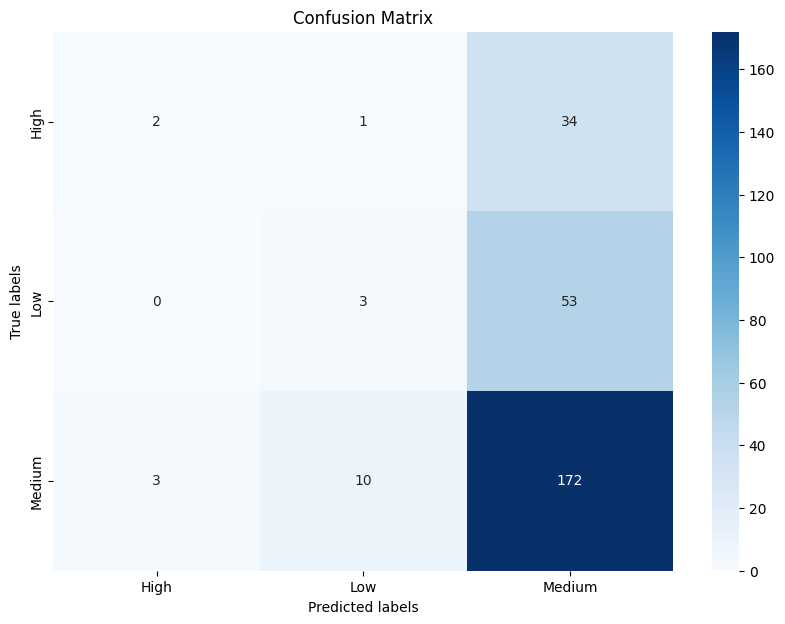

Results for Logistic Regression:
Accuracy: Avg = 0.6410, Std = 0.0080
Precision (Weighted): Avg = 0.5576, Std = 0.0193
Recall (Weighted): Avg = 0.6410, Std = 0.0080
F1-Macro: Avg = 0.3490, Std = 0.0206
F1-Weighted: Avg = 0.5602, Std = 0.0121
AUROC (Macro): Avg = 0.6271, Std = 0.0087
AUPRC (Macro): Avg = 0.4423, Std = 0.0106
AUPRC (High): Avg = 0.3001, Std = 0.0210
Evaluating model: Random Forest
['High' 'Low' 'Medium']
0


10it [00:10,  1.02s/it]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
10it [00:10,  1.01s/it]
10it [00:10,  1.01s/it]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
10it [00:10,  1.01s/it]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.33      0.04      0.06        56
           2       0.67      0.98      0.80       185

    accuracy                           0.66       278
   macro avg       0.33      0.34      0.29       278
weighted avg       0.51      0.66      0.54       278

Confusion Matrix:



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

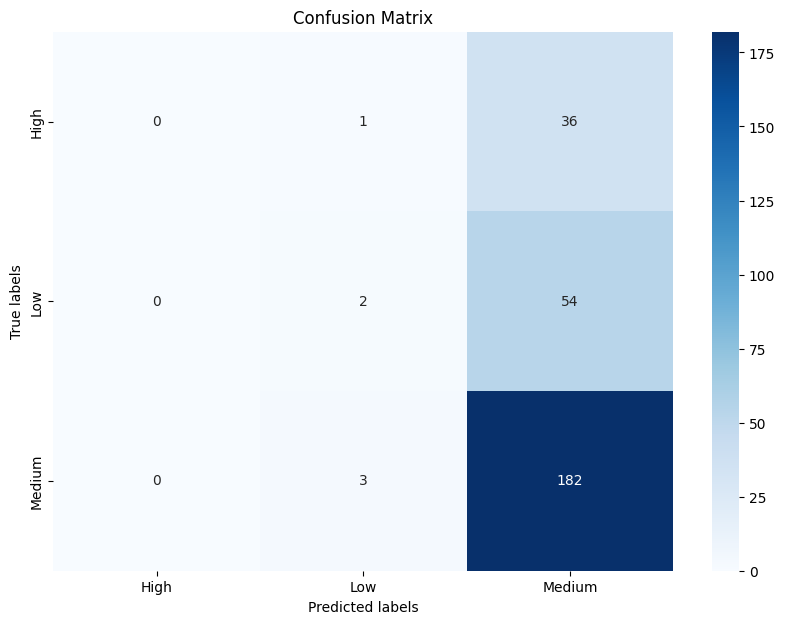

Results for Random Forest:
Accuracy: Avg = 0.6550, Std = 0.0096
Precision (Weighted): Avg = 0.5078, Std = 0.0280
Recall (Weighted): Avg = 0.6550, Std = 0.0096
F1-Macro: Avg = 0.2878, Std = 0.0110
F1-Weighted: Avg = 0.5409, Std = 0.0092
AUROC (Macro): Avg = 0.6228, Std = 0.0121
AUPRC (Macro): Avg = 0.4392, Std = 0.0105
AUPRC (High): Avg = 0.2801, Std = 0.0318
Evaluating model: XGBoost
['High' 'Low' 'Medium']
0


10it [00:36,  3.60s/it]
10it [00:33,  3.35s/it]
10it [00:35,  3.51s/it]
10it [00:33,  3.39s/it]
10it [00:33,  3.38s/it]
10it [00:33,  3.38s/it]
10it [00:33,  3.36s/it]
10it [00:34,  3.46s/it]
10it [00:33,  3.36s/it]
10it [00:33,  3.38s/it]

Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.16      0.23        37
           1       0.32      0.16      0.21        56
           2       0.69      0.88      0.77       185

    accuracy                           0.64       278
   macro avg       0.46      0.40      0.40       278
weighted avg       0.58      0.64      0.59       278

Confusion Matrix:


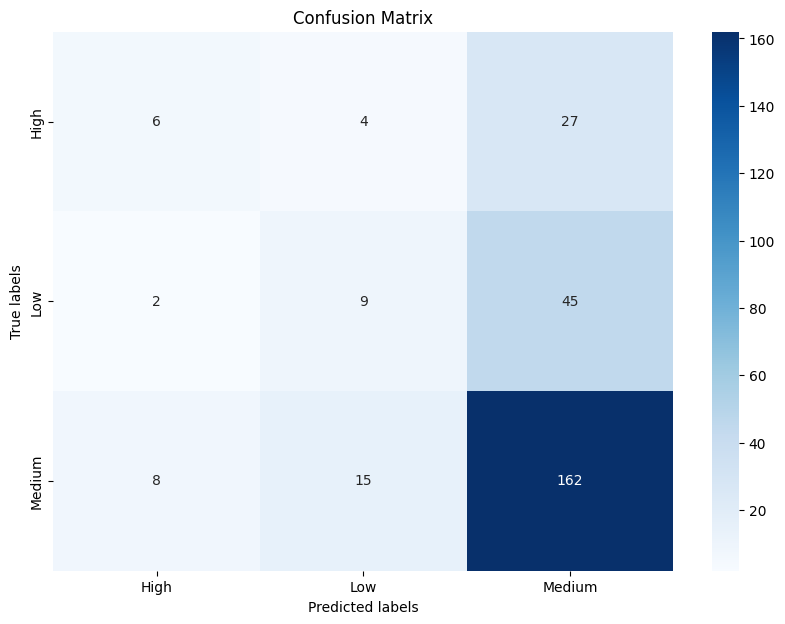

Results for XGBoost:
Accuracy: Avg = 0.6381, Std = 0.0153
Precision (Weighted): Avg = 0.5860, Std = 0.0240
Recall (Weighted): Avg = 0.6381, Std = 0.0153
F1-Macro: Avg = 0.4150, Std = 0.0247
F1-Weighted: Avg = 0.5913, Std = 0.0175
AUROC (Macro): Avg = 0.6415, Std = 0.0145
AUPRC (Macro): Avg = 0.4642, Std = 0.0110
AUPRC (High): Avg = 0.3125, Std = 0.0228
Evaluating model: SVM
['High' 'Low' 'Medium']
0


10it [00:02,  3.45it/s]
10it [00:02,  3.49it/s]
10it [00:02,  3.52it/s]
10it [00:02,  3.44it/s]
10it [00:02,  3.39it/s]
10it [00:03,  3.29it/s]
10it [00:02,  3.54it/s]
10it [00:02,  3.41it/s]
10it [00:03,  3.16it/s]
10it [00:02,  3.36it/s]

Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.11      0.17        37
           1       0.43      0.11      0.17        56
           2       0.68      0.93      0.79       185

    accuracy                           0.65       278
   macro avg       0.49      0.38      0.37       278
weighted avg       0.59      0.65      0.58       278

Confusion Matrix:


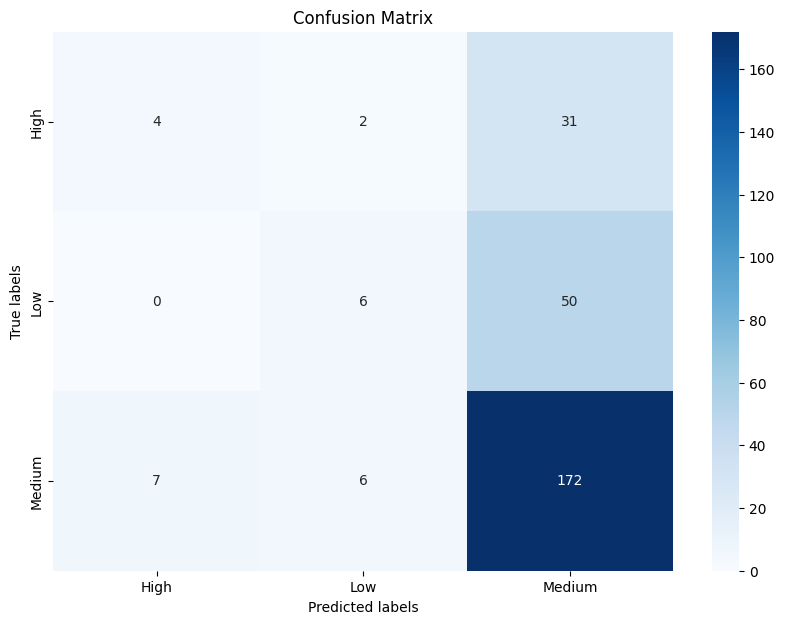

Results for SVM:
Accuracy: Avg = 0.6565, Std = 0.0086
Precision (Weighted): Avg = 0.5934, Std = 0.0185
Recall (Weighted): Avg = 0.6565, Std = 0.0086
F1-Macro: Avg = 0.3898, Std = 0.0203
F1-Weighted: Avg = 0.5840, Std = 0.0108
AUROC (Macro): Avg = 0.5915, Std = 0.0163
AUPRC (Macro): Avg = 0.4192, Std = 0.0138
AUPRC (High): Avg = 0.2707, Std = 0.0251
Evaluating model: Dummy Classifier
['High' 'Low' 'Medium']
0


10it [00:00, 189.52it/s]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
10it [00:00, 192.99it/s]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
10it [00:00, 206.53it/s]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division`

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.00      0.00      0.00        56
           2       0.67      1.00      0.80       185

    accuracy                           0.67       278
   macro avg       0.22      0.33      0.27       278
weighted avg       0.44      0.67      0.53       278

Confusion Matrix:


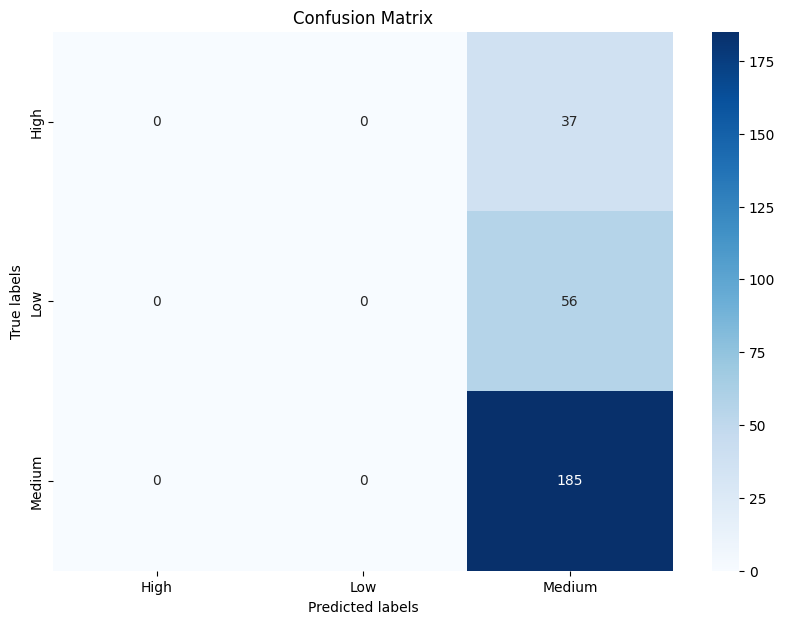

Results for Dummy Classifier:
Accuracy: Avg = 0.6655, Std = 0.0000
Precision (Weighted): Avg = 0.4428, Std = 0.0000
Recall (Weighted): Avg = 0.6655, Std = 0.0000
F1-Macro: Avg = 0.2664, Std = 0.0000
F1-Weighted: Avg = 0.5318, Std = 0.0000
AUROC (Macro): Avg = 0.5000, Std = 0.0000
AUPRC (Macro): Avg = 0.3333, Std = 0.0000
AUPRC (High): Avg = 0.1331, Std = 0.0000

Best model based on F1-Macro: XGBoost with F1-Macro = 0.4150


In [26]:
sensors_post_results = evaluate_multiple_models(df_sensors_post_selected, models_with_params, random_states)


### EMA, Sensors, and Endterm

In [27]:
### Here i left out calls data becuase of high missing rates
#df_ema_sensors_post = merge_datasets([ema_2019_2020_transformed, bluetooth_2019_2020, location_2019_2020, screen_2019_2020, sleep_2019_2020, steps_2019_2020, stress_endterm_2019_2020], on_column='pid', how='inner')

df_ema_sensors_post = merge_datasets([df_ema_post_selected, df_sensors_post_selected, stress_endterm_2019_2020], on_column=['pid', 'PSS_10items_POST'], how='inner')

df_ema_sensors_post = df_ema_sensors_post.dropna()
print(df_ema_sensors_post.shape)
_, df_ema_sensors_post_selected = perform_rfecv_classification(df_ema_sensors_post)
print(df_ema_sensors_post_selected.shape)


(221, 53)
Optimal number of features: 40
Features selected: ['phq4_EMA_mean', 'phq4_EMA_median', 'phq4_EMA_max', 'phq4_EMA_std', 'phq4_EMA_skew', 'phq4_EMA_kurt', 'phq4_EMA_rmsd', 'phq4_anxiety_EMA_mean', 'phq4_anxiety_EMA_max', 'phq4_anxiety_EMA_skew', 'phq4_depression_EMA_mean', 'phq4_depression_EMA_median', 'positive_affect_EMA_mean', 'positive_affect_EMA_median', 'positive_affect_EMA_max', 'positive_affect_EMA_min', 'positive_affect_EMA_skew', 'positive_affect_EMA_kurt', 'negative_affect_EMA_mean', 'negative_affect_EMA_median', 'negative_affect_EMA_max', 'negative_affect_EMA_std', 'negative_affect_EMA_skew', 'negative_affect_EMA_iqr', 'negative_affect_EMA_autocorr', 'negative_affect_EMA_rmsd', 'f_blue:phone_bluetooth_rapids_countscansmostuniquedevice:allday_mean', 'f_loc:phone_locations_barnett_hometime:allday_total_variation', 'f_loc:phone_locations_barnett_probpause:allday_curvature_mean', 'f_loc:phone_locations_barnett_probpause:allday_curvature_max', 'f_screen:phone_screen_rapi

Evaluating model: Logistic Regression
['High' 'Low' 'Medium']
0


10it [00:01,  9.01it/s]
10it [00:01,  9.09it/s]
10it [00:01,  8.91it/s]
10it [00:01,  9.14it/s]
10it [00:01,  8.89it/s]
10it [00:01,  8.93it/s]
10it [00:01,  8.77it/s]
10it [00:01,  8.99it/s]
10it [00:01,  9.18it/s]
10it [00:01,  8.93it/s]


Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.49      0.54        37
           1       0.41      0.23      0.29        31
           2       0.75      0.86      0.80       153

    accuracy                           0.71       221
   macro avg       0.59      0.52      0.54       221
weighted avg       0.68      0.71      0.69       221

Confusion Matrix:


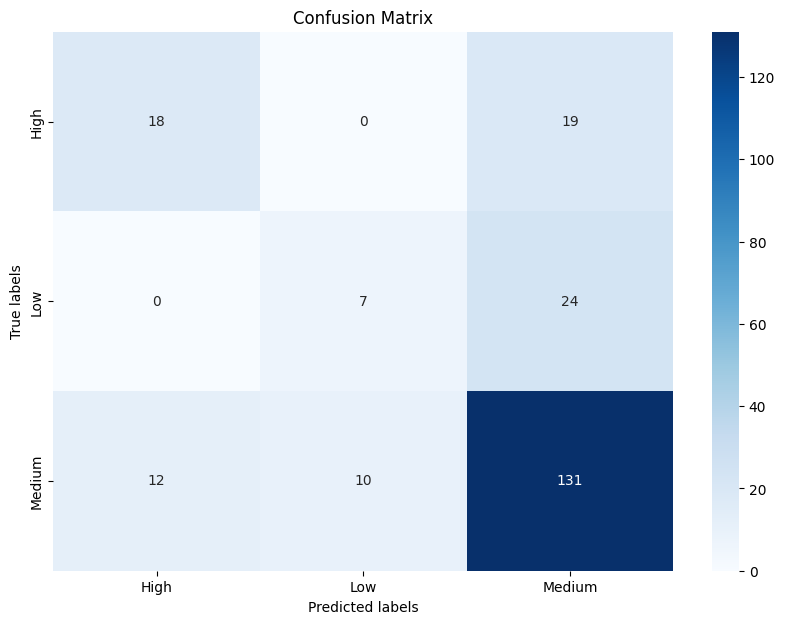

Results for Logistic Regression:
Accuracy: Avg = 0.7081, Std = 0.0086
Precision (Weighted): Avg = 0.6823, Std = 0.0159
Recall (Weighted): Avg = 0.7081, Std = 0.0086
F1-Macro: Avg = 0.5452, Std = 0.0267
F1-Weighted: Avg = 0.6879, Std = 0.0140
AUROC (Macro): Avg = 0.7729, Std = 0.0110
AUPRC (Macro): Avg = 0.5730, Std = 0.0167
AUPRC (High): Avg = 0.5896, Std = 0.0337
Evaluating model: Random Forest
['High' 'Low' 'Medium']
0


10it [00:09,  1.00it/s]
10it [00:09,  1.00it/s]
10it [00:09,  1.00it/s]
10it [00:09,  1.00it/s]
10it [00:09,  1.01it/s]
10it [00:09,  1.00it/s]
10it [00:09,  1.02it/s]
10it [00:09,  1.00it/s]
10it [00:09,  1.01it/s]
10it [00:10,  1.00s/it]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.59      0.66        37
           1       0.67      0.26      0.37        31
           2       0.79      0.92      0.85       153

    accuracy                           0.77       221
   macro avg       0.73      0.59      0.63       221
weighted avg       0.76      0.77      0.75       221

Confusion Matrix:


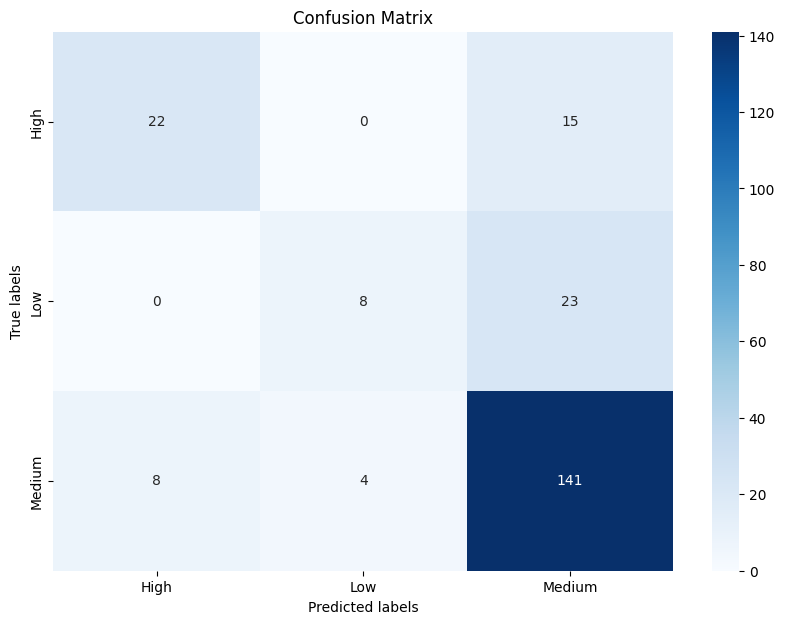

Results for Random Forest:
Accuracy: Avg = 0.7588, Std = 0.0118
Precision (Weighted): Avg = 0.7395, Std = 0.0196
Recall (Weighted): Avg = 0.7588, Std = 0.0118
F1-Macro: Avg = 0.5913, Std = 0.0239
F1-Weighted: Avg = 0.7301, Std = 0.0144
AUROC (Macro): Avg = 0.8054, Std = 0.0106
AUPRC (Macro): Avg = 0.6254, Std = 0.0178
AUPRC (High): Avg = 0.5701, Std = 0.0184
Evaluating model: XGBoost
['High' 'Low' 'Medium']
0


10it [00:27,  2.79s/it]
10it [00:27,  2.72s/it]
10it [00:27,  2.78s/it]
10it [00:31,  3.10s/it]
10it [00:29,  2.94s/it]
10it [00:27,  2.77s/it]
10it [00:28,  2.83s/it]
10it [00:27,  2.75s/it]
10it [00:27,  2.72s/it]
10it [00:27,  2.70s/it]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.43      0.51        37
           1       0.52      0.35      0.42        31
           2       0.76      0.87      0.81       153

    accuracy                           0.72       221
   macro avg       0.63      0.55      0.58       221
weighted avg       0.71      0.72      0.71       221

Confusion Matrix:


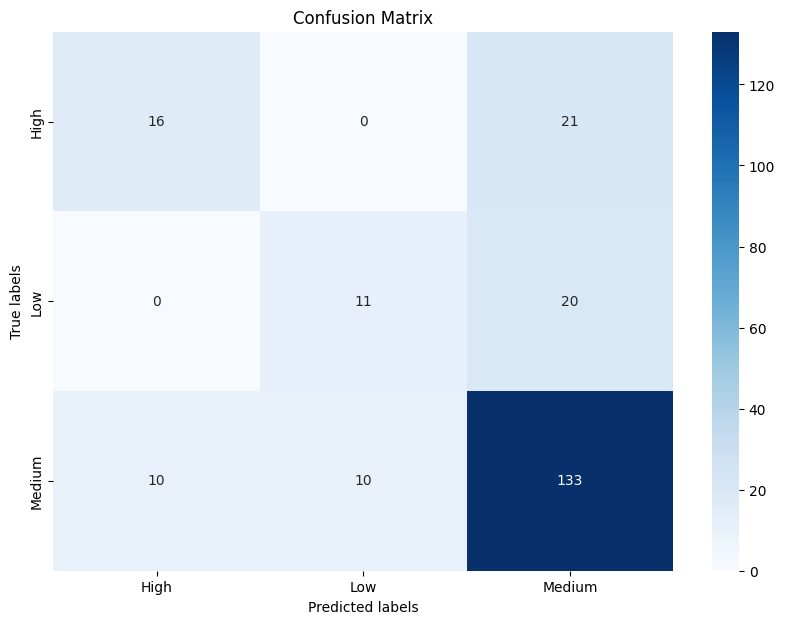

Results for XGBoost:
Accuracy: Avg = 0.7226, Std = 0.0209
Precision (Weighted): Avg = 0.7027, Std = 0.0250
Recall (Weighted): Avg = 0.7226, Std = 0.0209
F1-Macro: Avg = 0.5780, Std = 0.0335
F1-Weighted: Avg = 0.7062, Std = 0.0225
AUROC (Macro): Avg = 0.7719, Std = 0.0092
AUPRC (Macro): Avg = 0.5796, Std = 0.0176
AUPRC (High): Avg = 0.5383, Std = 0.0267
Evaluating model: SVM
['High' 'Low' 'Medium']
0


10it [00:02,  4.00it/s]
10it [00:02,  4.01it/s]
10it [00:02,  4.02it/s]
10it [00:02,  4.00it/s]
10it [00:02,  4.02it/s]
10it [00:02,  4.00it/s]
10it [00:02,  4.00it/s]
10it [00:02,  4.00it/s]
10it [00:02,  3.98it/s]
10it [00:02,  3.99it/s]

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.49      0.51        37
           1       0.48      0.32      0.38        31
           2       0.76      0.83      0.79       153

    accuracy                           0.70       221
   macro avg       0.59      0.55      0.56       221
weighted avg       0.68      0.70      0.69       221

Confusion Matrix:


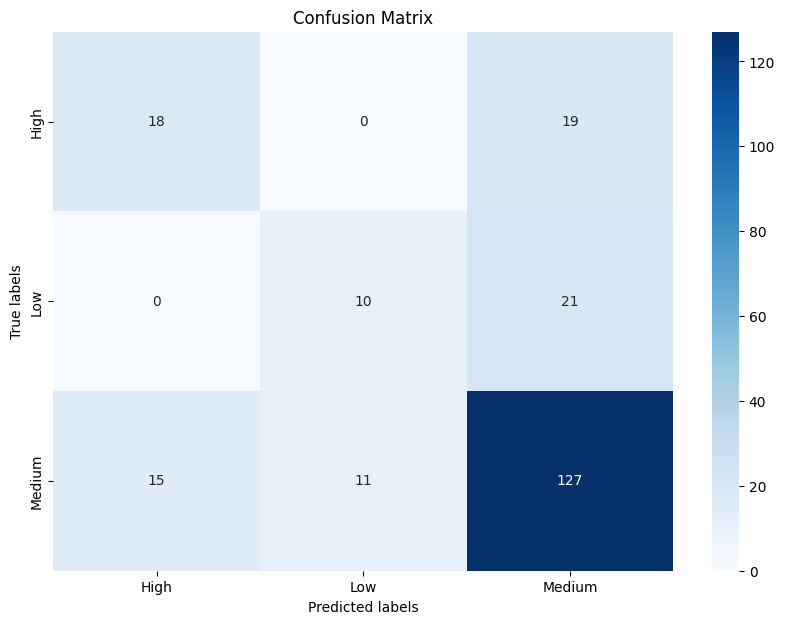

Results for SVM:
Accuracy: Avg = 0.6896, Std = 0.0097
Precision (Weighted): Avg = 0.6710, Std = 0.0112
Recall (Weighted): Avg = 0.6896, Std = 0.0097
F1-Macro: Avg = 0.5450, Std = 0.0169
F1-Weighted: Avg = 0.6776, Std = 0.0102
AUROC (Macro): Avg = 0.7583, Std = 0.0160
AUPRC (Macro): Avg = 0.5533, Std = 0.0222
AUPRC (High): Avg = 0.5550, Std = 0.0416
Evaluating model: Dummy Classifier
['High' 'Low' 'Medium']
0


10it [00:00, 170.81it/s]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
10it [00:00, 195.77it/s]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
10it [00:00, 196.44it/s]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division`

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.00      0.00      0.00        31
           2       0.69      1.00      0.82       153

    accuracy                           0.69       221
   macro avg       0.23      0.33      0.27       221
weighted avg       0.48      0.69      0.57       221

Confusion Matrix:


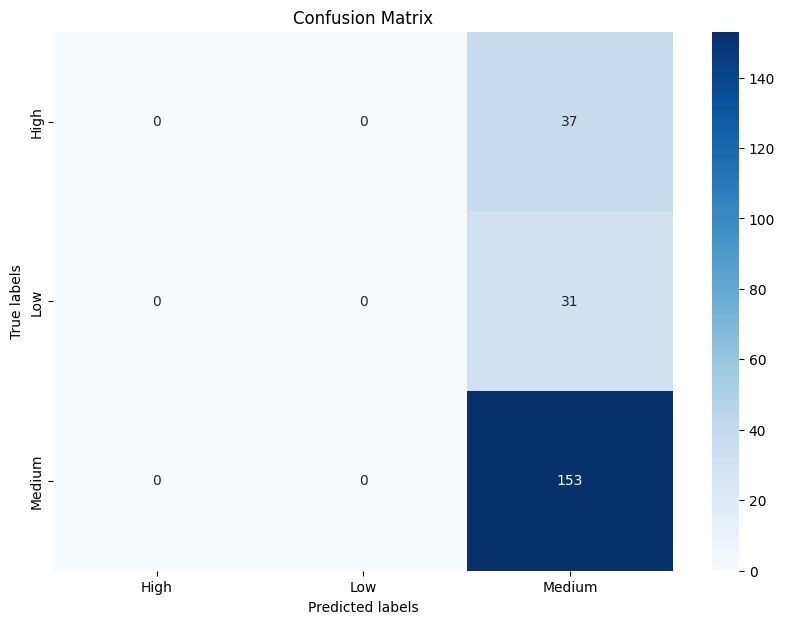

Results for Dummy Classifier:
Accuracy: Avg = 0.6923, Std = 0.0000
Precision (Weighted): Avg = 0.4793, Std = 0.0000
Recall (Weighted): Avg = 0.6923, Std = 0.0000
F1-Macro: Avg = 0.2727, Std = 0.0000
F1-Weighted: Avg = 0.5664, Std = 0.0000
AUROC (Macro): Avg = 0.5000, Std = 0.0000
AUPRC (Macro): Avg = 0.3333, Std = 0.0000
AUPRC (High): Avg = 0.1674, Std = 0.0000

Best model based on F1-Macro: Random Forest with F1-Macro = 0.5913


In [28]:
ema_sensors_post_results = evaluate_multiple_models(df_ema_sensors_post_selected, models_with_params, random_states)


### Pre, EMA, Sensors, and Endterm

In [29]:
### Here i left out calls data becuase of high missing rates
#df_pre_ema_sensors_post = merge_datasets([pre_2019_2020, ema_2019_2020_transformed, bluetooth_2019_2020, location_2019_2020, screen_2019_2020, sleep_2019_2020, steps_2019_2020, stress_endterm_2019_2020], on_column='pid', how='inner')

#df_pre_ema_sensors_post = merge_datasets([df_pre_post_selected, df_ema_post_selected, df_sensors_post_selected, stress_endterm_2019_2020], on_column=['pid', 'PSS_10items_POST'], how='inner')

df_pre_ema_sensors_post = merge_datasets([df_pre_post_selected, df_ema_sensors_post_selected, stress_endterm_2019_2020], on_column=['pid', 'PSS_10items_POST'], how='inner')

#df_pre_ema_sensors_post = merge_datasets([df_pre_ema_post_selected, df_sensors_post_selected, stress_endterm_2019_2020], on_column=['pid', 'PSS_10items_POST'], how='inner')

#df_pre_ema_sensors_post = df_pre_ema_sensors_post.drop(columns = ['CESD_10items_PRE', 'BYAACQ_PRE'])
df_pre_ema_sensors_post = df_pre_ema_sensors_post.dropna()
print(df_pre_ema_sensors_post.shape)
_, df_pre_ema_sensors_post_selected = perform_rfecv_classification(df_pre_ema_sensors_post)
print(df_pre_ema_sensors_post_selected.shape)


(205, 58)
Optimal number of features: 27
Features selected: ['SocialFit_PRE', 'PSS_10items_PRE', 'PSS_14items_PRE', 'STAI_PRE', 'BDI2_PRE', 'GQ_PRE', 'FSPWB_PRE', 'phq4_EMA_mean', 'phq4_EMA_median', 'phq4_EMA_max', 'phq4_EMA_std', 'phq4_anxiety_EMA_mean', 'phq4_anxiety_EMA_max', 'phq4_depression_EMA_mean', 'phq4_depression_EMA_median', 'positive_affect_EMA_mean', 'positive_affect_EMA_skew', 'negative_affect_EMA_mean', 'negative_affect_EMA_median', 'negative_affect_EMA_std', 'negative_affect_EMA_iqr', 'negative_affect_EMA_rmsd', 'f_blue:phone_bluetooth_rapids_countscansmostuniquedevice:allday_mean', 'f_loc:phone_locations_barnett_probpause:allday_curvature_max', 'f_slp:fitbit_sleep_intraday_rapids_sumdurationasleepunifiedmain:allday_mean', 'f_slp:fitbit_sleep_summary_rapids_sumdurationinbedmain:allday_total_variation', 'f_steps:fitbit_steps_intraday_rapids_countepisodesedentarybout:allday_slope_mean']
(205, 29)


Evaluating model: Logistic Regression
['High' 'Low' 'Medium']
0


10it [00:00, 11.09it/s]
10it [00:00, 10.98it/s]
10it [00:00, 11.08it/s]
10it [00:00, 11.48it/s]
10it [00:00, 10.38it/s]
10it [00:00, 11.35it/s]
10it [00:00, 11.84it/s]
10it [00:00, 11.33it/s]
10it [00:00, 10.76it/s]
10it [00:00, 11.29it/s]


Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.54      0.59        35
           1       0.53      0.29      0.37        28
           2       0.78      0.88      0.83       142

    accuracy                           0.74       205
   macro avg       0.65      0.57      0.60       205
weighted avg       0.72      0.74      0.72       205

Confusion Matrix:


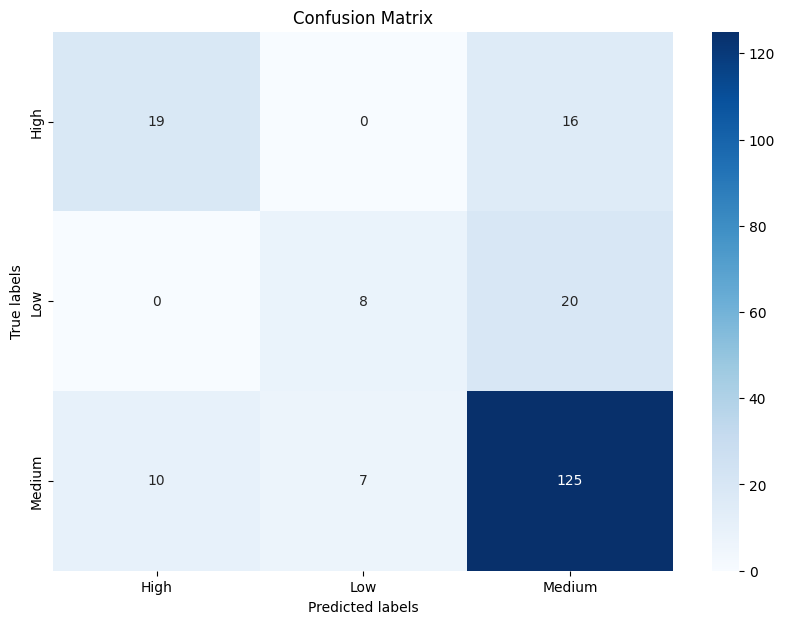

Results for Logistic Regression:
Accuracy: Avg = 0.7356, Std = 0.0117
Precision (Weighted): Avg = 0.7122, Std = 0.0158
Recall (Weighted): Avg = 0.7356, Std = 0.0117
F1-Macro: Avg = 0.5760, Std = 0.0254
F1-Weighted: Avg = 0.7137, Std = 0.0146
AUROC (Macro): Avg = 0.8398, Std = 0.0071
AUPRC (Macro): Avg = 0.6596, Std = 0.0111
AUPRC (High): Avg = 0.6222, Std = 0.0206
Evaluating model: Random Forest
['High' 'Low' 'Medium']
0


10it [00:09,  1.09it/s]
10it [00:09,  1.09it/s]
10it [00:09,  1.11it/s]
10it [00:09,  1.09it/s]
10it [00:09,  1.10it/s]
10it [00:09,  1.09it/s]
10it [00:09,  1.10it/s]
10it [00:09,  1.11it/s]
10it [00:09,  1.10it/s]
10it [00:09,  1.10it/s]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.57      0.62        35
           1       0.57      0.29      0.38        28
           2       0.78      0.89      0.83       142

    accuracy                           0.75       205
   macro avg       0.67      0.58      0.61       205
weighted avg       0.73      0.75      0.73       205

Confusion Matrix:


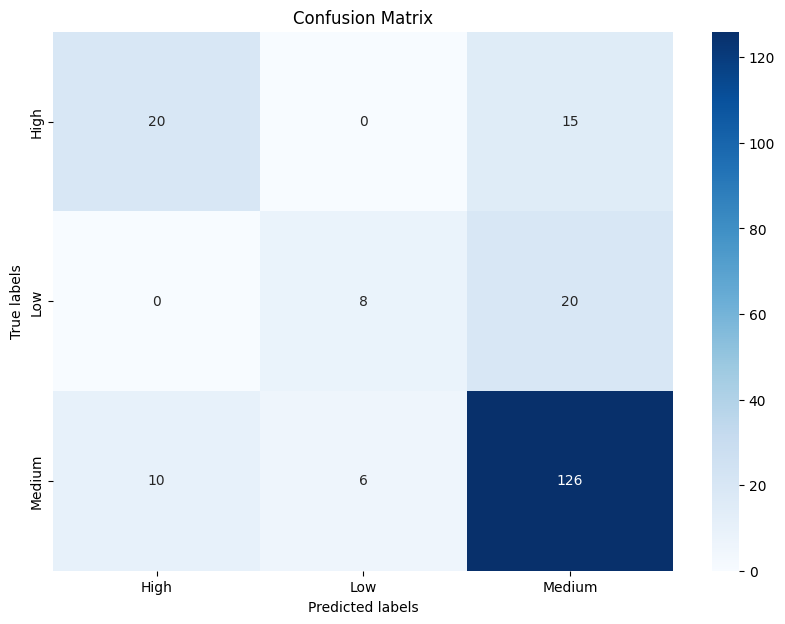

Results for Random Forest:
Accuracy: Avg = 0.7600, Std = 0.0119
Precision (Weighted): Avg = 0.7454, Std = 0.0183
Recall (Weighted): Avg = 0.7600, Std = 0.0119
F1-Macro: Avg = 0.5967, Std = 0.0228
F1-Weighted: Avg = 0.7333, Std = 0.0137
AUROC (Macro): Avg = 0.8473, Std = 0.0086
AUPRC (Macro): Avg = 0.6726, Std = 0.0179
AUPRC (High): Avg = 0.6129, Std = 0.0205
Evaluating model: XGBoost
['High' 'Low' 'Medium']
0


10it [00:27,  2.79s/it]
10it [00:30,  3.04s/it]
10it [00:32,  3.25s/it]
10it [00:31,  3.11s/it]
10it [00:34,  3.44s/it]
10it [00:30,  3.04s/it]
10it [00:27,  2.78s/it]
10it [00:26,  2.68s/it]
10it [00:26,  2.66s/it]
10it [00:25,  2.59s/it]

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.49      0.55        35
           1       0.64      0.32      0.43        28
           2       0.77      0.89      0.83       142

    accuracy                           0.75       205
   macro avg       0.68      0.57      0.60       205
weighted avg       0.73      0.75      0.73       205

Confusion Matrix:


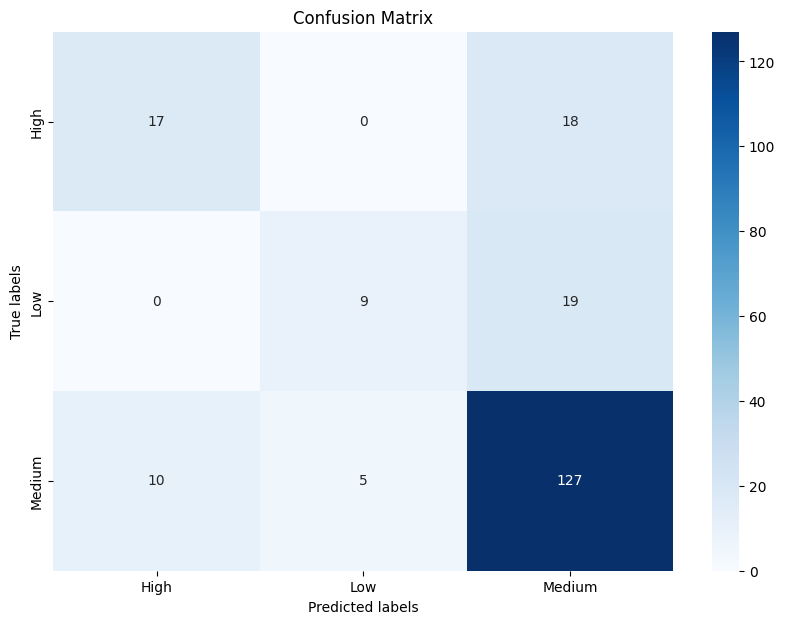

Results for XGBoost:
Accuracy: Avg = 0.7293, Std = 0.0143
Precision (Weighted): Avg = 0.7136, Std = 0.0162
Recall (Weighted): Avg = 0.7293, Std = 0.0143
F1-Macro: Avg = 0.5921, Std = 0.0192
F1-Weighted: Avg = 0.7146, Std = 0.0143
AUROC (Macro): Avg = 0.8294, Std = 0.0103
AUPRC (Macro): Avg = 0.6472, Std = 0.0207
AUPRC (High): Avg = 0.5554, Std = 0.0463
Evaluating model: SVM
['High' 'Low' 'Medium']
0


10it [00:01,  5.60it/s]
10it [00:01,  5.41it/s]
10it [00:01,  5.48it/s]
10it [00:01,  5.61it/s]
10it [00:01,  6.00it/s]
10it [00:01,  5.58it/s]
10it [00:01,  5.65it/s]
10it [00:01,  5.64it/s]
10it [00:01,  5.45it/s]
10it [00:01,  5.64it/s]


Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.46      0.49        35
           1       0.41      0.25      0.31        28
           2       0.75      0.83      0.79       142

    accuracy                           0.69       205
   macro avg       0.56      0.51      0.53       205
weighted avg       0.66      0.69      0.67       205

Confusion Matrix:


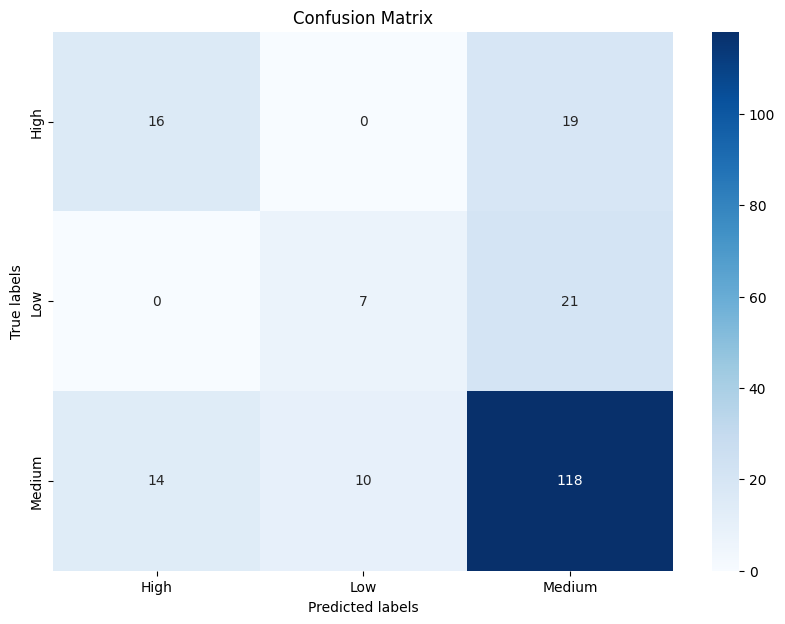

Results for SVM:
Accuracy: Avg = 0.7015, Std = 0.0233
Precision (Weighted): Avg = 0.6834, Std = 0.0258
Recall (Weighted): Avg = 0.7015, Std = 0.0233
F1-Macro: Avg = 0.5584, Std = 0.0343
F1-Weighted: Avg = 0.6885, Std = 0.0240
AUROC (Macro): Avg = 0.8011, Std = 0.0131
AUPRC (Macro): Avg = 0.6142, Std = 0.0216
AUPRC (High): Avg = 0.5641, Std = 0.0325
Evaluating model: Dummy Classifier
['High' 'Low' 'Medium']
0


10it [00:00, 185.30it/s]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
10it [00:00, 184.84it/s]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
10it [00:00, 186.50it/s]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division`

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.00      0.00      0.00        28
           2       0.69      1.00      0.82       142

    accuracy                           0.69       205
   macro avg       0.23      0.33      0.27       205
weighted avg       0.48      0.69      0.57       205

Confusion Matrix:


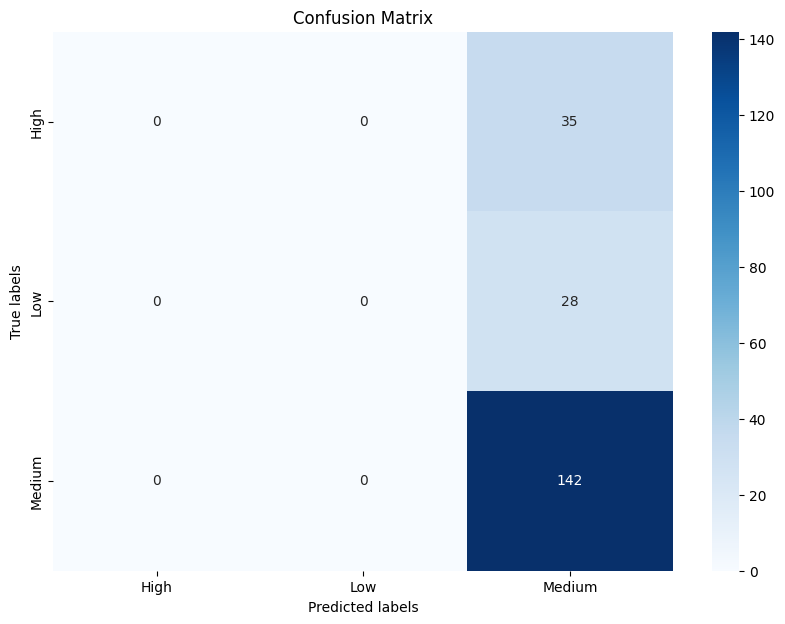

Results for Dummy Classifier:
Accuracy: Avg = 0.6927, Std = 0.0000
Precision (Weighted): Avg = 0.4798, Std = 0.0000
Recall (Weighted): Avg = 0.6927, Std = 0.0000
F1-Macro: Avg = 0.2728, Std = 0.0000
F1-Weighted: Avg = 0.5669, Std = 0.0000
AUROC (Macro): Avg = 0.5000, Std = 0.0000
AUPRC (Macro): Avg = 0.3333, Std = 0.0000
AUPRC (High): Avg = 0.1707, Std = 0.0000

Best model based on F1-Macro: Random Forest with F1-Macro = 0.5967


In [30]:

pre_ema_sensors_post_results = evaluate_multiple_models(df_pre_ema_sensors_post_selected, models_with_params, random_states)


### SHAP Analysis of the best model and with best dataset

### Fitting the Final model: 2019_2020 train and 2021 test

In [31]:
df_2021 = merge_datasets([pre_2021, 
                          ema_2021, 
                          bluetooth_2021, 
                          location_2021, 
                          screen_2021, 
                          sleep_2021, 
                          steps_2021, 
                          stress_endterm_2021], 
                         on_column='pid', how='inner')


In [32]:
# feature_rename = {
#     'f_blue:phone_bluetooth_rapids_countscansmostuniquedevice:allday_mean': 'bluetooth_countscansmostuniquedevice_mean',
#     'f_slp:fitbit_sleep_summary_rapids_sumdurationinbedmain:allday_mean': 'sumdurationbedmain_mean'
# }

# df_pre_ema_sensors_post_selected.rename(columns=feature_rename, inplace=True)
# df_2021.rename(columns=feature_rename, inplace=True)

In [33]:
df_train = df_pre_ema_sensors_post_selected
X_train = df_train.drop(columns=['PSS_10items_POST', 'pid']) 
y_train = df_train['PSS_10items_POST']

In [34]:
df_test = df_2021[df_pre_ema_sensors_post_selected.columns.to_list()].dropna()
X_test = df_test.drop(columns=['PSS_10items_POST', 'pid']) 
y_test = df_test['PSS_10items_POST']

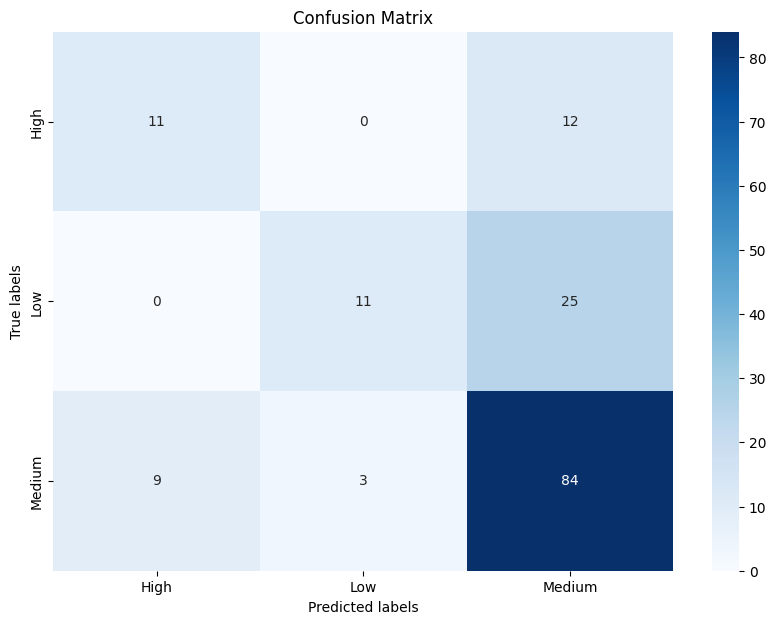

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


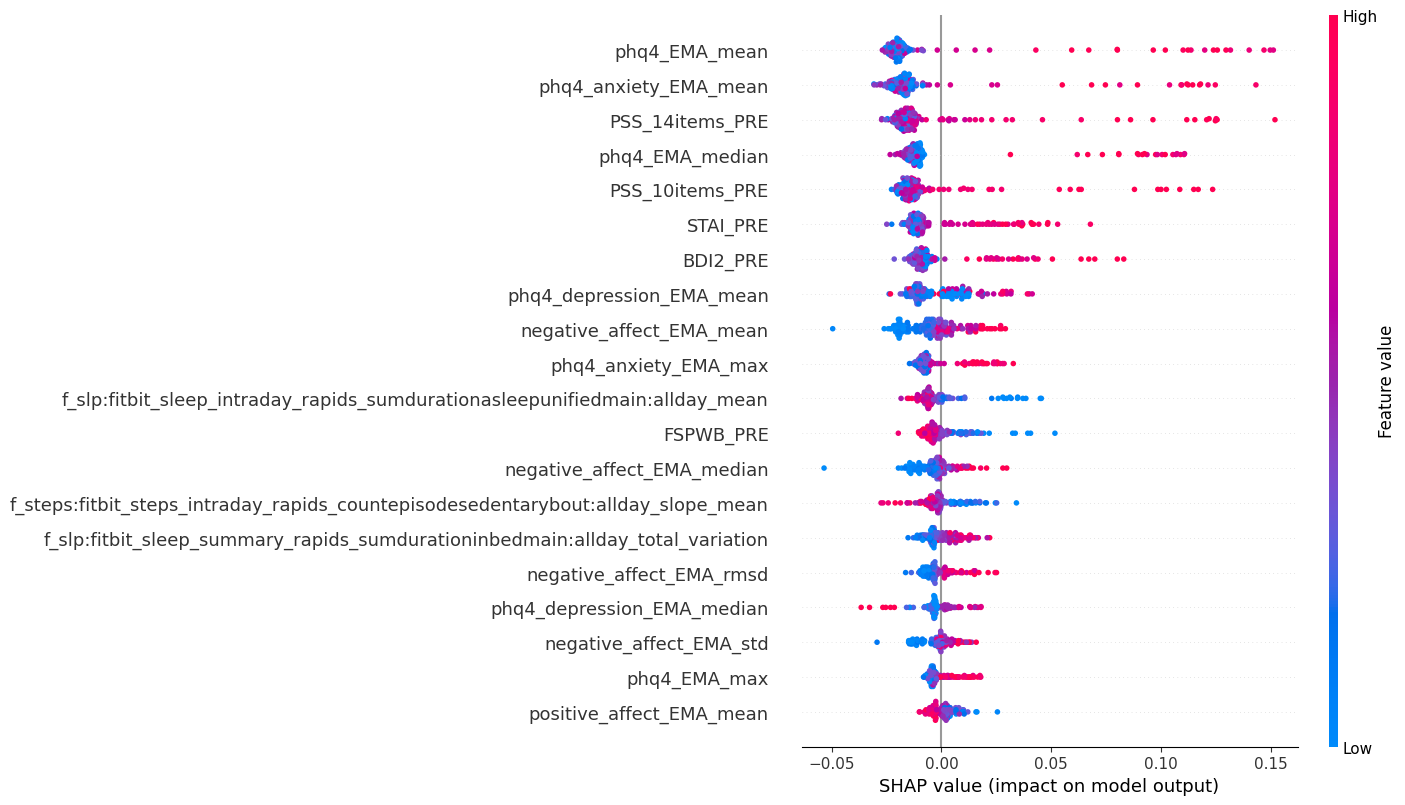

In [35]:
from evaluate_final_classification_model import *
# pre_ema_sensors_post_results = train_and_evaluate_model(X_train, y_train, X_test, y_test, 
#                                                         LogisticRegression(multi_class='multinomial', random_state=0, max_iter=10000), 
#                                                         {'C': [0.001, 0.01, 0.1, 1, 10]})

pre_ema_sensors_post_results = train_and_evaluate_model(X_train, y_train, X_test, y_test, 
                                                        RandomForestClassifier(random_state=0), 
                                                        {'max_depth': [3, 5, 7]})


In [36]:
for key, value in pre_ema_sensors_post_results.items():
    if isinstance(value, float):
        print(f"{key}: {value:.4f}")
    else:
        print(f"{key}: {value}")

Accuracy: 0.6839
Precision (Macro): 0.6766
Recall (Macro): 0.5529
F1 Score (Macro): 0.5753
Precision (Weighted): 0.6941
Recall (Weighted): 0.6839
F1 Score (Weighted): 0.6576
AUC: 0.8096
AUPRC (Macro): 0.6903
AUPRC (Weighted): 0.7285
SHAP_Summary_Plot: shap_summary_plot.png
